In [1]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('/content/ABBREV.csv')

In [4]:
df.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)     8364 non-null   float64
 16  Sodium_(mg)        8707 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [7]:
df.describe()

,index,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
count,8790.000000,8790.000000,8789.000000,8790.000000,8790.000000,8790.000000,8465.000000,8790.000000,8196.000000,6958.000000,...,5528.000000,5579.000000,5227.000000,8441.000000,8124.000000,8125.000000,8380.000000,8490.000000,4825.000000,8740.000000
mean,4394.500000,15663.495222,54.112218,226.317634,11.342849,10.553725,1.783468,22.127710,2.187445,8.543066,...,0.579269,22.990142,15.631586,3.576334,4.081006,2.288767,40.613246,96.395130,250.747668,4.964416
std,2537.598767,9251.413586,30.772854,169.877539,10.530474,15.814842,3.004609,27.270822,4.383138,14.923626,...,3.882702,154.614465,79.949125,6.518840,7.010760,5.215654,119.869371,84.337063,382.226774,12.088471
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.400000,0.000000
25%,2197.250000,9086.250000,29.700000,91.000000,2.380000,0.950000,0.840000,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.220000,0.235750,0.220000,0.000000,29.000000,42.000000,0.000000
50%,4394.500000,14427.500000,63.080000,191.000000,8.000000,5.140000,1.200000,9.340000,0.700000,1.840000,...,0.000000,0.000000,1.600000,1.592000,1.938500,0.696000,4.000000,85.000000,164.000000,0.000000
75%,6591.750000,20142.750000,77.960000,337.000000,19.880000,13.720000,2.090000,34.910000,2.600000,9.287500,...,0.200000,6.000000,5.200000,4.345000,5.115000,2.081000,67.000000,130.000000,305.000000,0.000000
max,8789.000000,93600.000000,100.000000,902.000000,88.320000,100.000000,99.800000,100.000000,79.000000,99.800000,...,250.000000,10000.000000,1714.500000,95.600000,83.689000,74.623000,3100.000000,1184.000000,5717.000000,81.000000


In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 index                   0
NDB_No                  0
Shrt_Desc               0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      

In [9]:
df.fillna(df.mean(), inplace=True)

<ipython-input-9-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [10]:
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 index                   0
NDB_No                  0
Shrt_Desc               0
Water_(g)               0
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)                 0
Carbohydrt_(g)          0
Fiber_TD_(g)            0
Sugar_Tot_(g)           0
Calcium_(mg)            0
Iron_(mg)               0
Magnesium_(mg)          0
Phosphorus_(mg)         0
Potassium_(mg)          0
Sodium_(mg)             0
Zinc_(mg)               0
Copper_mg)              0
Manganese_(mg)          0
Selenium_(µg)           0
Vit_C_(mg)              0
Thiamin_(mg)            0
Riboflavin_(mg)         0
Niacin_(mg)             0
Panto_Acid_mg)          0
Vit_B6_(mg)             0
Folate_Tot_(µg)         0
Folic_Acid_(µg)         0
Food_Folate_(µg)        0
Folate_DFE_(µg)         0
Choline_Tot_ (mg)       0
Vit_B12_(µg)            0
Vit_A_IU                0
Vit_A_RAE               0
Retinol_(µg)            0
Alpha_Carot_(µg)        0
Beta

In [13]:

non_numeric_columns = df.select_dtypes(exclude='number').columns
print(non_numeric_columns)

Index(['Shrt_Desc', 'GmWt_Desc1', 'GmWt_Desc2'], dtype='object')


In [14]:
numeric_columns = df.select_dtypes(include='number').columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Impute numeric columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Impute non-numeric columns with most frequent value
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])

In [19]:
numeric_cols = df.select_dtypes(include=['float64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

In [20]:
non_numeric_cols = df.select_dtypes(exclude=['float64']).columns
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])

In [21]:
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 index                0
NDB_No               0
Shrt_Desc            0
Water_(g)            0
Energ_Kcal           0
Protein_(g)          0
Lipid_Tot_(g)        0
Ash_(g)              0
Carbohydrt_(g)       0
Fiber_TD_(g)         0
Sugar_Tot_(g)        0
Calcium_(mg)         0
Iron_(mg)            0
Magnesium_(mg)       0
Phosphorus_(mg)      0
Potassium_(mg)       0
Sodium_(mg)          0
Zinc_(mg)            0
Copper_mg)           0
Manganese_(mg)       0
Selenium_(µg)        0
Vit_C_(mg)           0
Thiamin_(mg)         0
Riboflavin_(mg)      0
Niacin_(mg)          0
Panto_Acid_mg)       0
Vit_B6_(mg)          0
Folate_Tot_(µg)      0
Folic_Acid_(µg)      0
Food_Folate_(µg)     0
Folate_DFE_(µg)      0
Choline_Tot_ (mg)    0
Vit_B12_(µg)         0
Vit_A_IU             0
Vit_A_RAE            0
Retinol_(µg)         0
Alpha_Carot_(µg)     0
Beta_Carot_(µg)      0
Beta_Crypt_(µg)      0
Lycopene_(µg)        0
Lut+Zea_ (µg)        0
Vit_E_(mg)           0


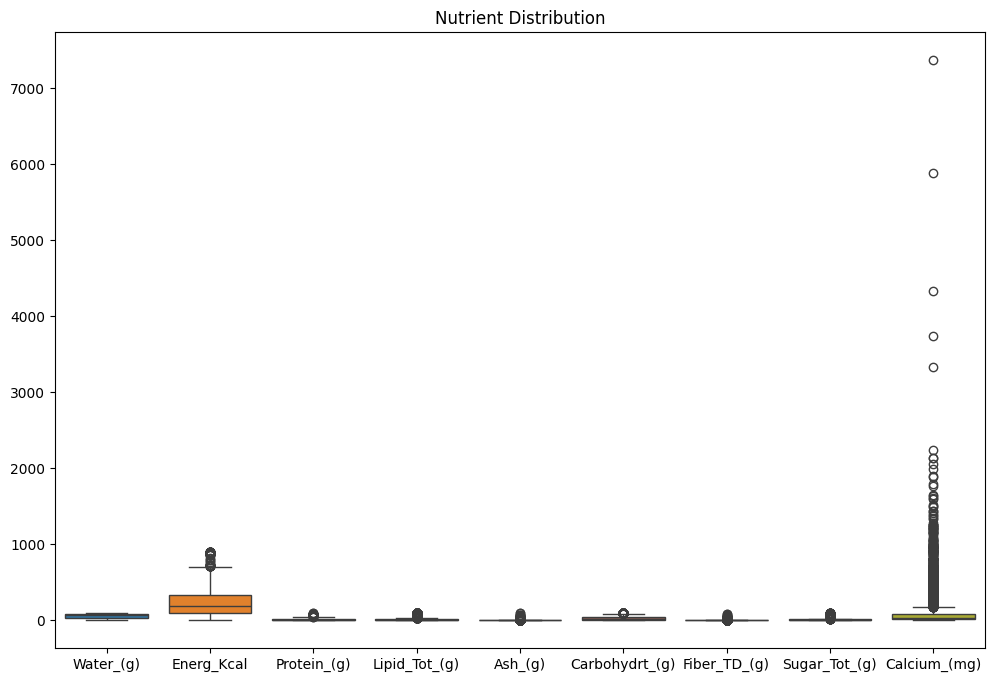

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 3:12])  # Visualize nutrient columns
plt.title("Nutrient Distribution")
plt.show()

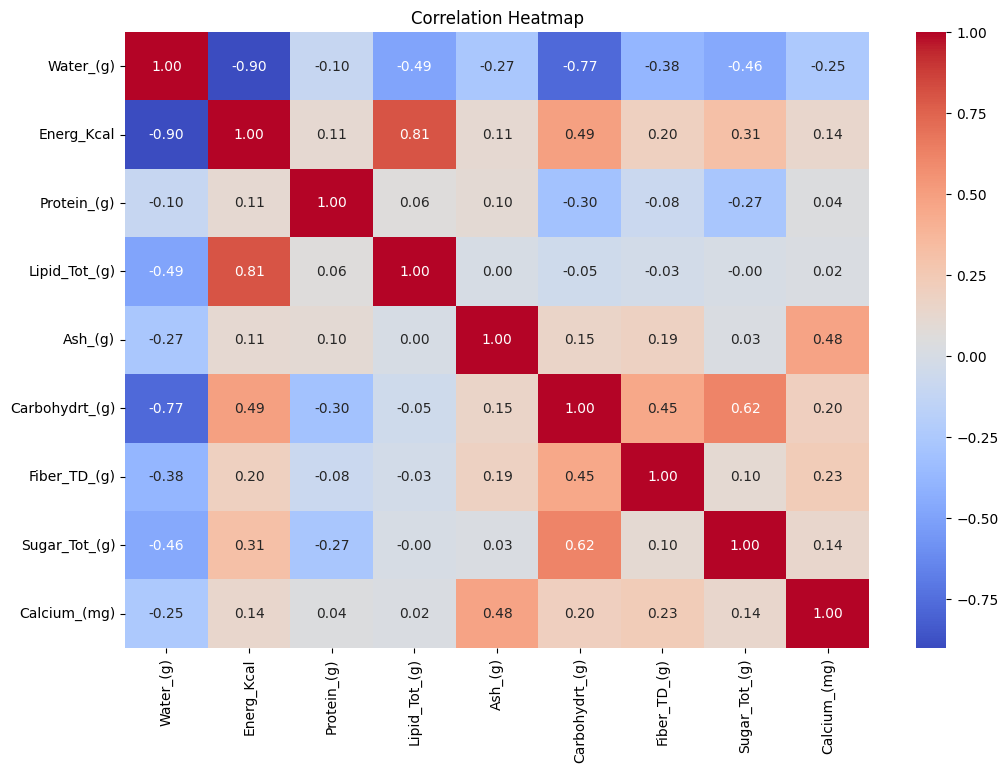

In [23]:
correlation_matrix = df.iloc[:, 3:12].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
print("Data Types:\n", df.dtypes)

Data Types:
 index                float64
NDB_No               float64
Shrt_Desc             object
Water_(g)            float64
Energ_Kcal           float64
Protein_(g)          float64
Lipid_Tot_(g)        float64
Ash_(g)              float64
Carbohydrt_(g)       float64
Fiber_TD_(g)         float64
Sugar_Tot_(g)        float64
Calcium_(mg)         float64
Iron_(mg)            float64
Magnesium_(mg)       float64
Phosphorus_(mg)      float64
Potassium_(mg)       float64
Sodium_(mg)          float64
Zinc_(mg)            float64
Copper_mg)           float64
Manganese_(mg)       float64
Selenium_(µg)        float64
Vit_C_(mg)           float64
Thiamin_(mg)         float64
Riboflavin_(mg)      float64
Niacin_(mg)          float64
Panto_Acid_mg)       float64
Vit_B6_(mg)          float64
Folate_Tot_(µg)      float64
Folic_Acid_(µg)      float64
Food_Folate_(µg)     float64
Folate_DFE_(µg)      float64
Choline_Tot_ (mg)    float64
Vit_B12_(µg)         float64
Vit_A_IU             float64
V

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
numeric_cols = df.select_dtypes(include=['float64']).columns


In [27]:
scaler = StandardScaler()

In [29]:
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [30]:
df.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,-1.731854,-1.584983,"BUTTER,WITH SALT",-1.242867,2.888612,-0.996484,4.461650,0.110750,-0.809252,-0.516859,...,-0.140019,7.481783,2.513532,0.150420,1.490059,-1.102734,"1 pat, (1"" sq, 1/3"" high)",-0.835388,1 tbsp,-0.41187
1,-1.731460,-1.584874,"BUTTER,WHIPPED,W/ SALT",-1.215242,2.894499,-1.030672,4.283959,-0.055444,-0.706206,-0.516859,...,-0.178951,6.545927,2.343341,0.207857,1.575505,-1.117213,"1 pat, (1"" sq, 1/3"" high)",-0.852340,1 tbsp,-0.41187
2,-1.731066,-1.584766,"BUTTER OIL,ANHYDROUS",-1.750840,3.824633,-1.050615,5.623283,-0.604901,-0.811452,-0.516859,...,-0.114064,9.134324,3.657679,0.280252,1.840387,-1.008623,1 tbsp,-0.161562,1 cup,-0.41187
3,-1.730671,-1.584658,"CHEESE,BLUE",-0.380321,0.745770,0.955106,1.150015,1.128263,-0.725641,-0.516859,...,-0.214639,2.362756,0.548555,-0.296912,0.293820,-0.821003,1 oz,-0.825500,1 cubic inch,-0.41187
4,-1.730277,-1.584550,"CHEESE,BRICK",-0.422570,0.851735,1.129847,1.209457,0.473663,-0.709139,-0.516859,...,-0.213016,2.377628,0.670225,-0.300103,0.456167,0.429593,"1 cup, diced",-0.486468,"1 cup, shredded",-0.41187


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
print(model)

LinearRegression()


In [35]:
X = df.drop(['index', 'NDB_No', 'Shrt_Desc', 'Energ_Kcal'], axis=1)  # Exclude non-numeric and non-target columns
y = df['Energ_Kcal']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
df_encoded = pd.get_dummies(df, columns=non_numeric_cols)

In [44]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_columns)

# Display the new DataFrame with only numeric columns
print(df_numeric)





         index    NDB_No  Water_(g)  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
0    -1.731854 -1.584983  -1.242867    2.888612    -0.996484       4.461650   
1    -1.731460 -1.584874  -1.215242    2.894499    -1.030672       4.283959   
2    -1.731066 -1.584766  -1.750840    3.824633    -1.050615       5.623283   
3    -1.730671 -1.584658  -0.380321    0.745770     0.955106       1.150015   
4    -1.730277 -1.584550  -0.422570    0.851735     1.129847       1.209457   
...        ...       ...        ...         ...          ...            ...   
8785  1.730277  7.290815  -0.361146    0.463197     0.679700       0.919839   
8786  1.730671  8.061552   0.524476   -0.678867     0.873434      -0.614251   
8787  1.731066  8.087495  -0.913643    0.251268    -1.077206      -0.667368   
8788  1.731460  8.096143   0.815350   -0.802492     0.451777      -0.578839   
8789  1.731854  8.424760   0.792600   -0.808379     0.803158      -0.635751   

       Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar

In [45]:
print(df.columns)


Index(['index', 'NDB_No', 'Shrt_Desc', 'Water_(g)', 'Energ_Kcal',
       'Protein_(g)', 'Lipid_Tot_(g)', 'Ash_(g)', 'Carbohydrt_(g)',
       'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Calcium_(mg)', 'Iron_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Sodium_(mg)',
       'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(µg)',
       'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)',
       'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(µg)', 'Folic_Acid_(µg)',
       'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(µg)', 'Vit_A_IU', 'Vit_A_RAE', 'Retinol_(µg)',
       'Alpha_Carot_(µg)', 'Beta_Carot_(µg)', 'Beta_Crypt_(µg)',
       'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)', 'Vit_D_µg', 'Vit_D_IU',
       'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)', 'FA_Poly_(g)',
       'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2',
       'Refuse_Pct'],
      dtype='object')


In [47]:
# Check for non-numeric values in numeric columns
for column in df_numeric.columns:
    non_numeric_values = df_numeric[column].loc[~pd.to_numeric(df_numeric[column], errors='coerce').notna()]
    if not non_numeric_values.empty:
        print(f"Column '{column}' has non-numeric values:\n{non_numeric_values}\n")


In [48]:
# Replace non-numeric values with NaN
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')


In [49]:
df_numeric = df_numeric.dropna()


In [50]:
X = df.drop(['index', 'NDB_No', 'Shrt_Desc'], axis=1)  # Exclude non-numeric and non-target columns
y = df['Energ_Kcal']  # Assuming 'Energ_Kcal' is the target variable, change it accordingly

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7032, 51)
X_test shape: (1758, 51)
y_train shape: (7032,)
y_test shape: (1758,)


In [51]:
from sklearn.linear_model import LinearRegression

# Create a model instance
model = LinearRegression()

# Display the model parameters
print(model)

LinearRegression()


In [58]:
# Identify columns with non-numeric values
non_numeric_columns = df_numeric.columns[df_numeric.apply(lambda col: col.apply(lambda x: not pd.api.types.is_numeric_dtype(type(x))).any())]

print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: Index([], dtype='object')


In [60]:
# Drop non-numeric and non-target columns
X_train_numeric = X_train.select_dtypes(include=['float64'])
X_test_numeric = X_test.select_dtypes(include=['float64'])

# Train the chosen model using the training data
model.fit(X_train_numeric, y_train)


LinearRegression()

In [61]:
# Make predictions on the test set
y_pred = model.predict(X_test_numeric)

# Evaluate the model using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')


Mean Absolute Error: 1.6171992907932188e-15
Mean Squared Error: 5.703722561608385e-30


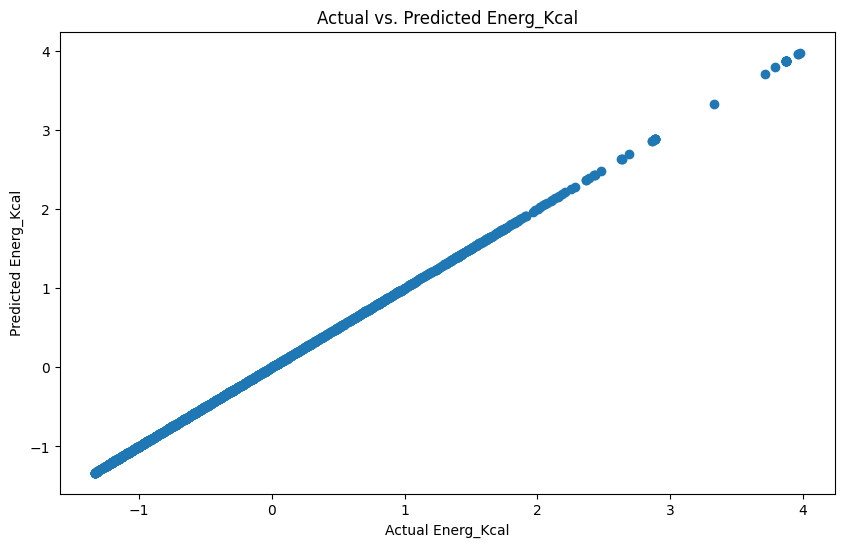

In [62]:
# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energ_Kcal")
plt.ylabel("Predicted Energ_Kcal")
plt.title("Actual vs. Predicted Energ_Kcal")
plt.show()


In [64]:
# Define hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]  # Adding a valid parameter
}


In [65]:
# Create the GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_numeric, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test_numeric)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

# Display evaluation metrics for the best model
print(f'Best Model - Mean Absolute Error: {mae_best}')
print(f'Best Model - Mean Squared Error: {mse_best}')


Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': True}
Best Model - Mean Absolute Error: 7.030043976994168e-15
Best Model - Mean Squared Error: 7.768019335060034e-29


In [67]:
import joblib

# Save the best model to a file
joblib.dump(best_model, 'nutrition_predictor_model.joblib')

# Later, in a different script or application, you can load the model for predictions
loaded_model = joblib.load('nutrition_predictor_model.joblib')

# Example: Make predictions using the loaded model
new_data = X_test_numeric.iloc[0:8]  # Replace with your new data
predictions = loaded_model.predict(new_data)
print("Predictions:", predictions)


Predictions: [-0.09606074 -0.61411043 -0.40806794  0.94592556 -0.99676076 -1.22635097
  0.23360724 -1.22635097]
